In [52]:
import pandas as pd
import numpy as np
import keras as k
from sklearn.model_selection import train_test_split 

# import BBCA_JK new.csv as a dataframe
df = pd.read_csv('BBCA.JK new.csv')



In [53]:
df.drop("Date", axis=1, inplace=True)
df.drop("Adj Close", axis=1, inplace=True)
df.drop("Volume", axis=1, inplace=True)



,Open,High,Low,Close
0,5200.0,5200.0,5200.0,5200.0
1,5200.0,5245.0,5200.0,5240.0
2,5200.0,5220.0,5115.0,5180.0
3,5175.0,5205.0,5125.0,5205.0
4,5265.0,5325.0,5245.0,5245.0
...,...,...,...,...
1246,9600.0,9650.0,9525.0,9625.0
1247,9450.0,9600.0,9450.0,9600.0
1248,9600.0,9600.0,9475.0,9525.0
1249,9450.0,9575.0,9450.0,9500.0


In [55]:

# divide data as train and test with an 80% split using sklearn first 3 columns are the labels, last column is the target, do not change index
train, test = train_test_split(df, test_size=0.2, random_state=42, shuffle=False)

In [56]:
test

,Open,High,Low,Close
1000,8050.0,8150.0,8000.0,8125.0
1001,8150.0,8275.0,8125.0,8175.0
1002,8150.0,8175.0,8025.0,8050.0
1003,8050.0,8200.0,8050.0,8150.0
1004,8175.0,8375.0,8150.0,8325.0
...,...,...,...,...
1246,9600.0,9650.0,9525.0,9625.0
1247,9450.0,9600.0,9450.0,9600.0
1248,9600.0,9600.0,9475.0,9525.0
1249,9450.0,9575.0,9450.0,9500.0


In [64]:

#create a keras model, with two layers and 25 neurons per layer, the last column as the target. it should be a regression model and use mean squared error

model = k.models.Sequential()
model.add(k.layers.Dense(250, input_dim=3, activation='relu'))
# add dropout layer
model.add(k.layers.Dropout(0.2))
model.add(k.layers.Dense(250, activation='relu'))
# add dropout layer
model.add(k.layers.Dropout(0.2))
model.add(k.layers.Dense(1, activation='linear'))

#compile the model
opt = k.optimizers.Adam(learning_rate=0.0005)
model.compile(loss='mse', optimizer=opt)

#fit the model
model.fit(train.iloc[:,:3], train.iloc[:,3], epochs=100, batch_size=10)

#evaluate the model
model.evaluate(test.iloc[:,:3], test.iloc[:,3])

Epoch 1/100
100/100 [==============================] - 0s 1ms/step - loss: 3956977.0000
Epoch 2/100
100/100 [==============================] - 0s 893us/step - loss: 470505.6562
Epoch 3/100
100/100 [==============================] - 0s 929us/step - loss: 453221.1250
Epoch 4/100
100/100 [==============================] - 0s 931us/step - loss: 341185.5312
Epoch 5/100
100/100 [==============================] - 0s 830us/step - loss: 305905.8750
Epoch 6/100
100/100 [==============================] - 0s 995us/step - loss: 298098.1250
Epoch 7/100
100/100 [==============================] - 0s 918us/step - loss: 274957.8438
Epoch 8/100
100/100 [==============================] - 0s 881us/step - loss: 254630.8750
Epoch 9/100
100/100 [==============================] - 0s 861us/step - loss: 235638.3438
Epoch 10/100
100/100 [==============================] - 0s 924us/step - loss: 246459.9219
Epoch 11/100
100/100 [==============================] - 0s 863us/step - loss: 246157.5938
Epoch 12/100
100/100

929915.0625

8/8 [==============================] - 0s 885us/step


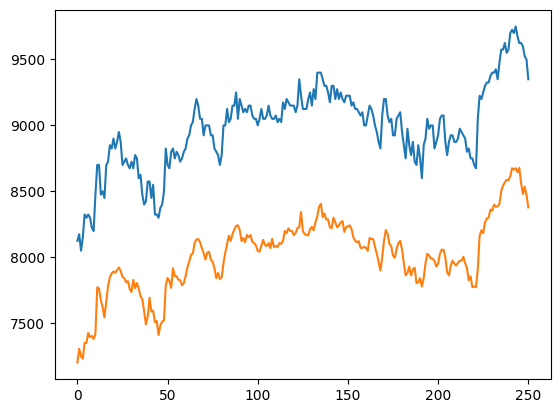

In [65]:


#plot two line plots, one for the actual values and one for the predicted values, reset test data index to 0
import matplotlib.pyplot as plt
plt.plot(test.iloc[:,3].reset_index(drop=True))
plt.plot(model.predict(test.iloc[:,:3]))
plt.show()






In [18]:
model.predict(test.iloc[:,:3])

7/7 [==============================] - 0s 787us/step


array([[ 0.25893912],
       [-0.18484864],
       [ 0.12951267],
       [ 0.00373283],
       [ 0.02874452],
       [-0.05579584],
       [ 0.07605065],
       [-0.01668452],
       [ 0.01050415],
       [-0.07830361],
       [-0.00744373],
       [-0.02257302],
       [-0.11638287],
       [ 0.1177441 ],
       [-0.03562431],
       [ 0.09355153],
       [-0.19718288],
       [ 0.21795236],
       [ 0.2532898 ],
       [ 0.12675646],
       [-0.186881  ],
       [-0.10673942],
       [-0.00074491],
       [ 0.10561384],
       [-0.04650421],
       [-0.10541759],
       [ 0.10144526],
       [ 0.11895376],
       [-0.1019379 ],
       [-0.09298529],
       [-0.28616023],
       [-0.12140717],
       [ 0.11857401],
       [-0.09106173],
       [ 0.01636708],
       [-0.1823393 ],
       [ 0.01205426],
       [-0.208877  ],
       [ 0.08725579],
       [ 0.04411204],
       [ 0.00100888],
       [-0.13262515],
       [-0.03413413],
       [-0.11105401],
       [ 0.16820398],
       [-0

In [22]:
test.iloc[:,3]

521   -0.280677
737    0.878829
740    0.254646
660    0.093398
411   -0.189069
         ...   
408    0.136739
332    0.131615
208    0.426450
613    0.132239
78     0.755904
Name: D, Length: 200, dtype: float64